In [1]:
What is Style Transfer?

Object `Transfer` not found.


In [2]:
How it works?

Object `works` not found.


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T

In [4]:
from imageio import imread

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\GopiP\AppData\Local\Temp\ipykernel_25000\3382432356.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [7]:
vggnet = torchvision.models.vgg19(pretrained=True)

d:\Ed\Anaconda\envs\torch_py312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Ed\Anaconda\envs\torch_py312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
for p in vggnet.parameters():
    p.requires_grad = False

vggnet.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cup'
vggnet.to(device);

In [10]:
# import two images

In [11]:
img4content = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')
img4style   = imread('https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg')

C:\Users\GopiP\AppData\Local\Temp\ipykernel_25000\2826952217.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img4content = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')
C:\Users\GopiP\AppData\Local\Temp\ipykernel_25000\2826952217.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img4style   = imread('https://upload.wikimedia.org/wikipedia/commons/c/c5/Edvard_Munch%2C_1893%2C_The_Scream%2C_oil%2C_tempera_and_pastel_on_cardboard%2C_91_x_73_cm%2C_National_Gallery_of_Norway.jpg')


In [12]:
img4trgt = np.random.randint(low=0, high=255, size=img4content.shape, dtype=np.uint8)

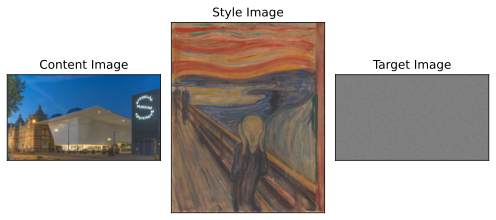

In [13]:
fig, ax = plt.subplots(1,3, figsize=(7,5))

ax[0].imshow(img4content)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Content Image')
ax[1].imshow(img4style)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Style Image')
ax[2].imshow(img4trgt)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Target Image')
plt.tight_layout()
plt.show()

In [14]:
print(img4style.shape)
print(img4content.shape)
print(img4trgt.shape)

(4000, 3223, 3)
(1675, 3000, 3)
(1675, 3000, 3)


In [15]:
trnsfrm_img = T.Compose([ T.ToTensor()
                         , T.Resize(256)
                         , T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.228, 0.224, 0.225])
                         ])

In [16]:
img4content = trnsfrm_img(img4content).unsqueeze(0).to(device)
img4style = trnsfrm_img(img4style).unsqueeze(0).to(device)
img4trgt = trnsfrm_img(img4trgt).unsqueeze(0).to(device)

In [17]:
print(img4style.shape)
print(img4content.shape)
print(img4trgt.shape)

torch.Size([1, 3, 317, 256])
torch.Size([1, 3, 256, 458])
torch.Size([1, 3, 256, 458])


In [18]:
def getFeatureMapActs(img, net):

    featuremaps = []
    featurenames = []
    convlayerIdx = 0
    for layer in range(len(net.features)):
        
        img = net.features[layer](img)

        if 'Conv2d' in str(net.features[layer]):
            featuremaps.append(img)
            featurenames.append('ConvLayer_' + str(convlayerIdx))
            convlayerIdx += 1

    return featuremaps, featurenames

In [19]:
def gram_matrix(M):

    _, chans, height, width = M.shape
    M = M.reshape(chans, height*width)

    gram = torch.mm(M, M.t()) / (chans*height*width)
    return gram

In [20]:
featuremaps, featurenames = getFeatureMapActs(img4content, vggnet)

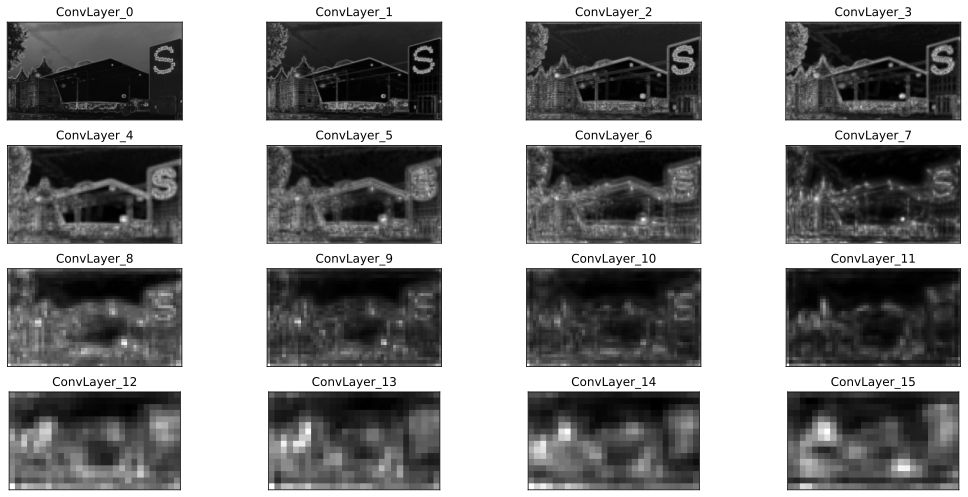

In [21]:
fig, axes = plt.subplots(4,4, figsize = (15,7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for fn, fm, ax in zip(featurenames, featuremaps, axes):

    pic = fm.mean(dim=1).squeeze().cpu().numpy()
    pic_norm = (pic - np.min(pic)) / (np.max(pic) - np.min(pic))

    ax.imshow(pic_norm, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(fn)

plt.tight_layout()
plt.show()

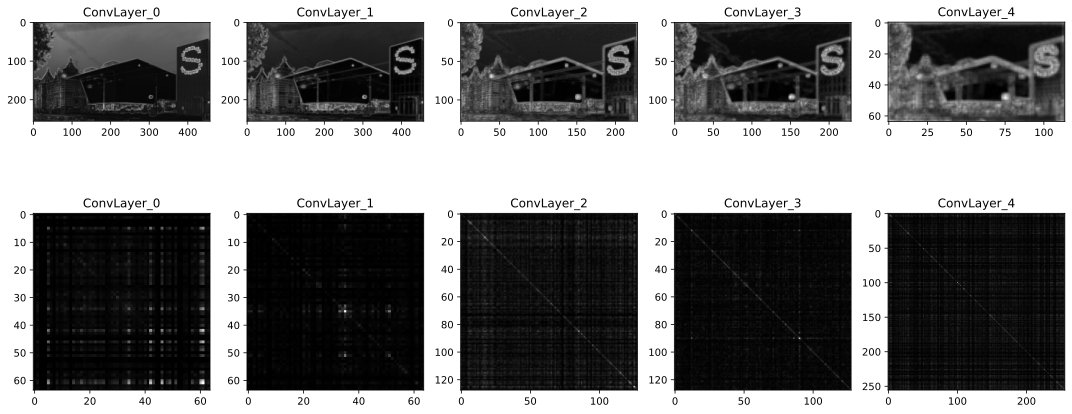

In [22]:
fig, axes = plt.subplots(2,5, figsize = (15,7))

# Flatten the axes array for easy iteration
# axes = axes.flatten()

for fn, fm, ax in zip(featurenames[:5], featuremaps[:5], range(5)):

    pic = fm.mean(dim=1).squeeze().cpu().numpy()
    pic_norm = (pic - np.min(pic)) / (np.max(pic) - np.min(pic))

    axes[0, ax].imshow(pic_norm, cmap='gray')
    # axes[0, ax].set_xticks([])
    # axes[0, ax].set_yticks([])
    axes[0, ax].set_title(fn)


    GRM_RSLT = gram_matrix(fm)

    axes[1, ax].imshow(GRM_RSLT.cpu().numpy(), cmap='gray')
    # axes[1, ax].set_xticks([])
    # axes[1, ax].set_yticks([])
    axes[1, ax].set_title(fn)    

plt.tight_layout()
plt.show()

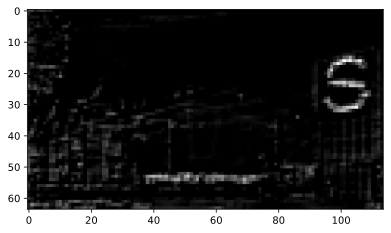

In [23]:
plt.imshow(fm.squeeze()[0].cpu().numpy(), cmap='gray')

In [24]:
layers4content = ['ConvLayer_1', 'ConvLayer_4']
layer4style = ['ConvLayer_1', 'ConvLayer_2', 'ConvLayer_3', 'ConvLayer_4', 'ConvLayer_5']
weights4style = [ 1, .5, .5, .2, .1]

In [25]:
target = img4trgt.clone()
target.requires_grad = True
target = target.to(device)
StyleScaling = 1e6

In [26]:
numepochs = 1500

In [27]:
optimizer = torch.optim.RMSprop([target], lr=.005)

In [28]:
contentfeaturemaps, contentfeaturenames = getFeatureMapActs(img4content, vggnet)
stylefeaturemaps, stylefeaturenames = getFeatureMapActs(img4style, vggnet)

In [29]:
for epoch in range(numepochs):
    targetfeaturemaps, targetfeaturenames = getFeatureMapActs(target, vggnet)
    contentLoss = 0
    styleLoss = 0

    for layeri in range(len(targetfeaturenames)):

        if targetfeaturenames[layeri] in layers4content:
            contentLoss += torch.mean((targetfeaturemaps[layeri] - contentfeaturemaps[layeri]) ** 2)

        if targetfeaturenames[layeri] in layer4style:
            Gram_target = gram_matrix(targetfeaturemaps[layeri])
            Gram_style = gram_matrix(stylefeaturemaps[layeri]) 

            styleLoss += torch.mean((Gram_target - Gram_style) ** 2) * weights4style[layer4style.index(targetfeaturenames[layeri])]

    combinedLoss = StyleScaling*styleLoss + contentLoss

    optimizer.zero_grad()
    combinedLoss.backward()
    optimizer.step()

In [30]:
target.min(), target.max()

(tensor(-2.2863, device='cuda:0', grad_fn=<MinBackward1>),
 tensor(2.7963, device='cuda:0', grad_fn=<MaxBackward1>))

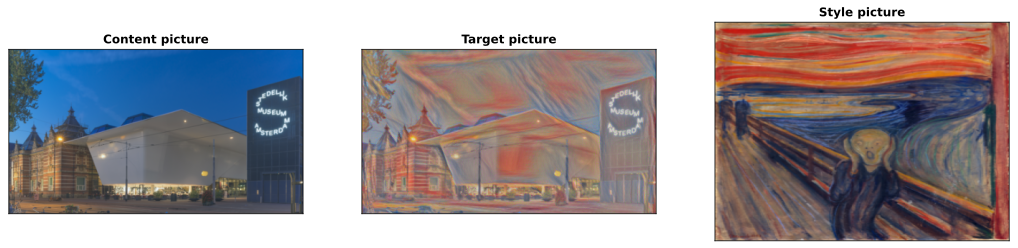

In [31]:
# the "after" pic
fig,ax = plt.subplots(1,3,figsize=(18,11))

pic = img4content.cpu().squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[0].imshow(pic)
ax[0].set_title('Content picture',fontweight='bold')
ax[0].set_xticks([])
ax[0].set_yticks([])

pic = torch.sigmoid(target).cpu().detach().squeeze().numpy().transpose((1,2,0))
ax[1].imshow(pic)
ax[1].set_title('Target picture',fontweight='bold')
ax[1].set_xticks([])
ax[1].set_yticks([])

pic = img4style.cpu().squeeze().numpy().transpose((1,2,0))
pic = (pic-np.min(pic)) / (np.max(pic)-np.min(pic))
ax[2].imshow(pic,aspect=.6)
ax[2].set_title('Style picture',fontweight='bold')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

In [32]:
styleLoss

tensor(9.4855e-07, device='cuda:0', grad_fn=<AddBackward0>)